<a href="https://colab.research.google.com/github/mohamedzaghloul-lab638/ChemTwin/blob/main/ChemTwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
! pip install rdkit
from rdkit import Chem , DataStructs
from rdkit.Chem import AllChem , rdFingerprintGenerator

In [24]:
# getting the number of the whole compound
m1 = Chem.MolFromSmiles('C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)O  ') # doxorubucin
print (f' Num of atoms is : {m1.GetNumAtoms()}')
m2 = Chem.MolFromSmiles('C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)C)O)N)O    ') # daunorubucin
print (f' Num of atoms is : {m2.GetNumAtoms()}')


 Num of atoms is : 39
 Num of atoms is : 38


In [12]:
# testing the match & getting the indices of match ( if any )
m1 = Chem.MolFromSmiles('C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)O  ') # doxorubucin
m2 = Chem.MolFromSmiles('C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)C)O)N)O    ') # daunorubucin
print (m1.HasSubstructMatch(m2))
print(m1.GetSubstructMatch(m2))



True
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38)


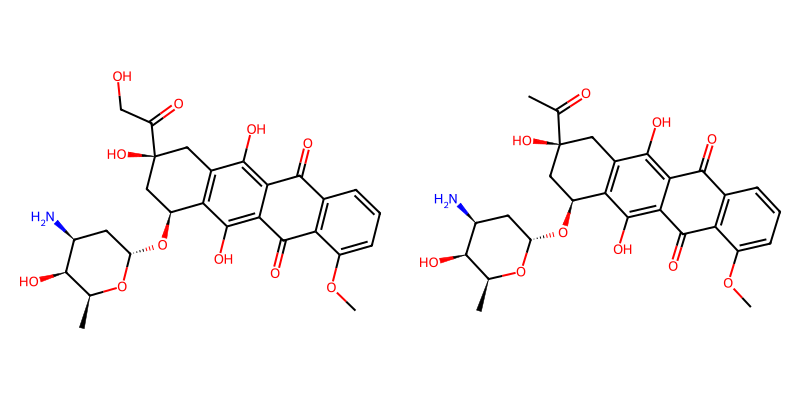

In [34]:
# 3D visualization
from rdkit.Chem import Draw
Draw.MolsToImage ([m1 , m2] , subImgSize=( 400 , 400))

In [42]:
# tanimoto similarity between the 2 Compounds
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2 , fpSize=2048)
fp1= morgan_gen.GetFingerprint(m1)# doxorubucin
fp2= morgan_gen.GetFingerprint(m2)# daunorubucin
similarity = DataStructs.TanimotoSimilarity(fp1,fp2)
print (f'Tanimoto similarity between the 2 compounds is >>  {similarity*100:.2f} %')

if 0.8 <=similarity < 0.9 :
  print ('compounds are very similar')
elif similarity >= 0.9 :
  print ('compounds are nearly identical')
elif   0.6 <=similarity <0.8 :
  print ('compounds have a good similarity')
else :
    print(' compounds are different')



Tanimoto similarity between the 2 compounds is >>  85.33 %
compounds are very similar
